# 1. data cleaning and exploration

## imports

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

%matplotlib inline

## load data

In [383]:
# load features
features = pd.read_csv('../data/raw/dengue_features_train.csv')

In [384]:
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [385]:
features.shape

(1456, 24)

In [386]:
# load labels
labels = pd.read_csv('../data/raw/dengue_labels_train.csv')

In [387]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [388]:
labels.shape

(1456, 4)

In [389]:
# bring into one main dataframe to explore relationship
df = pd.merge(labels, features, how='left', on=['city', 'year', 'weekofyear'])

In [390]:
df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [391]:
df.shape

(1456, 25)

## data exploration

** trends over time in total cases by city**

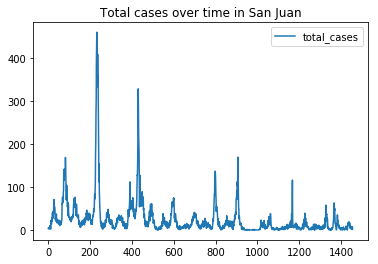

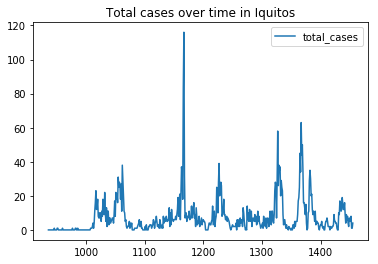

In [392]:
# plot for sj
df[['city', 'total_cases', 'week_start_date']].plot(title='Total cases over time in San Juan')
df[df.city=='iq'][['total_cases', 'week_start_date']].plot(title='Total cases over time in Iquitos');

In [393]:
df[df.city=='sj'][['total_cases', 'week_start_date']].head()

,total_cases,week_start_date
0,4,1990-04-30
1,5,1990-05-07
2,4,1990-05-14
3,3,1990-05-21
4,6,1990-05-28


In [394]:
df[df.city=='sj'][['total_cases', 'week_start_date']].tail()

,total_cases,week_start_date
931,4,2008-03-25
932,3,2008-04-01
933,1,2008-04-08
934,3,2008-04-15
935,5,2008-04-22


In [395]:
df[df.city=='iq'][['total_cases', 'week_start_date']].head()

,total_cases,week_start_date
936,0,2000-07-01
937,0,2000-07-08
938,0,2000-07-15
939,0,2000-07-22
940,0,2000-07-29


In [396]:
df[df.city=='iq'][['total_cases', 'week_start_date']].tail()

,total_cases,week_start_date
1451,5,2010-05-28
1452,8,2010-06-04
1453,1,2010-06-11
1454,1,2010-06-18
1455,4,2010-06-25


A few observations:
- sj data ranges from 1990 to 2008 while iq ranges from 2000 to 2010; so some overlap but sj series is much long

In [397]:
df.info()
# mostly numeric, with exception of city and week start date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
total_cases                              1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_

### city

In [398]:
# let's create a dummy variable for city
# new variable where 1 correponds to sj
df['sj'] = df['city'].map(lambda x: 1 if x=='sj' else 0)
# drop original city
df.drop('city', axis=1, inplace = True)

### dates

In [399]:
# convert week start date to parsed date
df['date'] = pd.to_datetime(df.week_start_date)

In [400]:
df.date.head()

0   1990-04-30
1   1990-05-07
2   1990-05-14
3   1990-05-21
4   1990-05-28
Name: date, dtype: datetime64[ns]

In [401]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [402]:
# confirm years align
df['year2'] = df['date'].dt.year
df['year'].equals(df['year2'])

True

In [403]:
# confirm weekofyear aligns
df.weekofyear.head()

0    18
1    19
2    20
3    21
4    22
Name: weekofyear, dtype: int64

In [404]:
df['date'].map(datetime.date.isocalendar).head()

0    (1990, 18, 1)
1    (1990, 19, 1)
2    (1990, 20, 1)
3    (1990, 21, 1)
4    (1990, 22, 1)
Name: date, dtype: object

In [405]:
# drop unnecessary date columns now so entire dataframe is numeric
df.drop(['year', 'weekofyear', 'week_start_date', 'date'], axis=1, inplace = True)
# doing it this way so year variable is at end of df, with total_cases (y) the first column
df.rename(columns={'year2': 'year'}, inplace = True)

In [406]:
df.head()

,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,sj,month,day,year
0,4,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,1,4,30,1990
1,5,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,1,5,7,1990
2,4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,1,5,14,1990
3,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,1,5,21,1990
4,6,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,1,5,28,1990


In [407]:
df.info()
# most missing values appear to be in ndvi_ne

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
total_cases                              1456 non-null int64
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-null float64
reanalysis_sp

In [408]:
# appears that in most cases, missing data is at max 3% of observations; will use linear interpolation methods
df = df.interpolate()

In [409]:
# break into two cities for visual analysis below
sj = df[df.sj==1]
iq = df[df.sj==0]

### NDVI

In [410]:
ndvi_sj = sj[['total_cases', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]
ndvi_iq = iq[['total_cases', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]

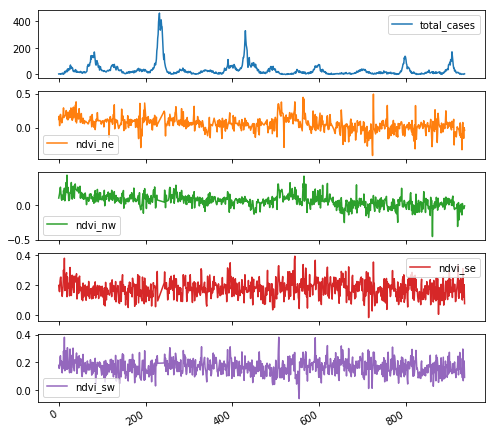

In [411]:
ndvi_sj.plot(subplots=True, figsize = (8,8));

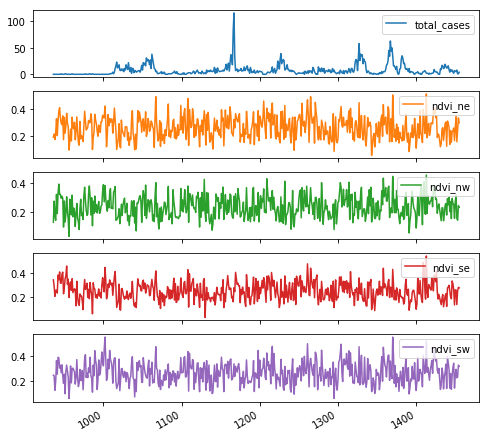

In [412]:
ndvi_iq.plot(subplots=True, figsize = (8,8));

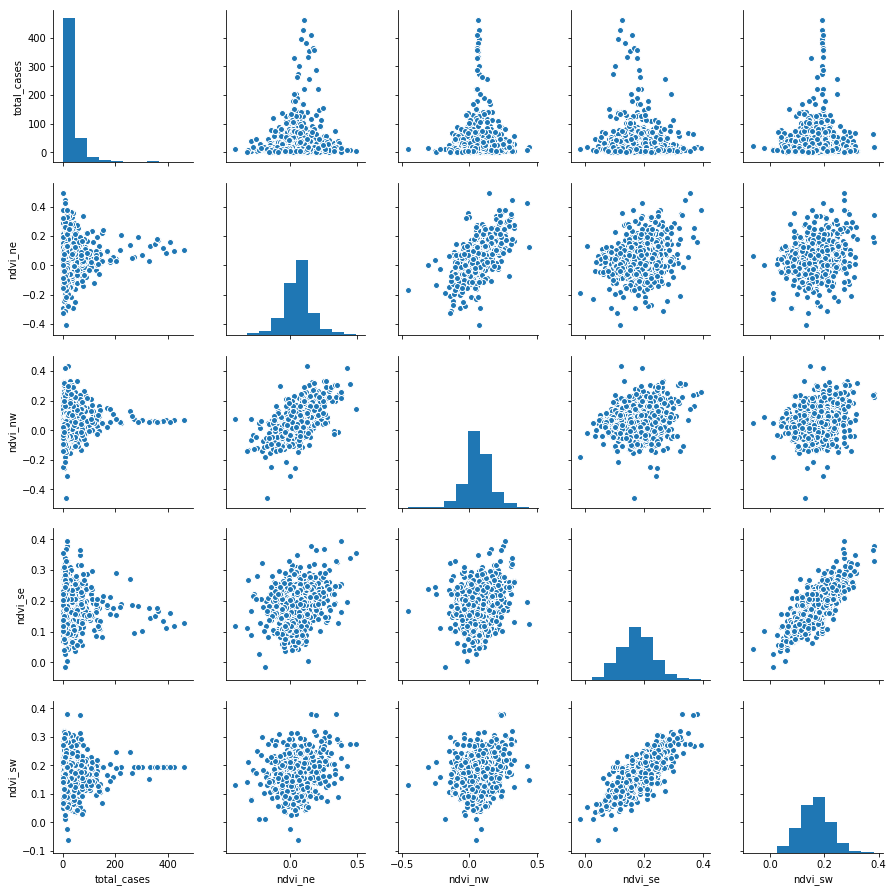

In [413]:
# let's look at NDVI correlations for San Juan
sns.pairplot(ndvi_sj)

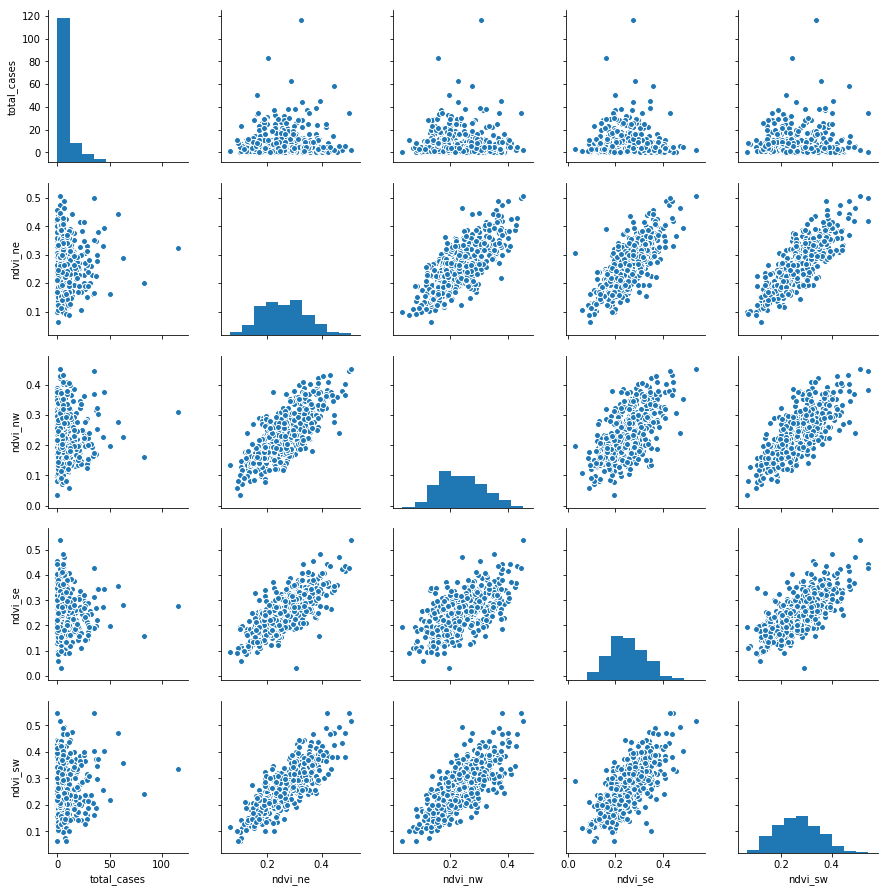

In [414]:
# NDVI correlations for Iquitos
sns.pairplot(ndvi_iq)

In [415]:
ndvi_sj.corr()

,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
total_cases,1.000000,0.085918,0.047403,-0.043680,0.042670
ndvi_ne,0.085918,1.000000,0.632660,0.219353,0.181035
ndvi_nw,0.047403,0.632660,1.000000,0.197311,0.217740
ndvi_se,-0.043680,0.219353,0.197311,1.000000,0.814621
ndvi_sw,0.042670,0.181035,0.217740,0.814621,1.000000


Strong correlation between SE and SW; similarly strong correlation between NE and NW. Interesting that correlations hold for East-West relationship but less strongly for North-South. In terms of relationship with total cases, seems a high number of total cases correlates to a specific NDVI value, though that NDVI value is also seen when total cases is lower. 

In [416]:
ndvi_iq.corr()
# ndvi appears to be less important for iq

,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
total_cases,1.000000,0.020794,-0.009952,-0.040643,0.032812
ndvi_ne,0.020794,1.000000,0.764200,0.769360,0.842922
ndvi_nw,-0.009952,0.764200,1.000000,0.644541,0.765389
ndvi_se,-0.040643,0.769360,0.644541,1.000000,0.715192
ndvi_sw,0.032812,0.842922,0.765389,0.715192,1.000000


### temperatures

**many temperature variables in the dataset**  
- station_max_temp_c – Maximum temperature  
- station_min_temp_c – Minimum temperature  
- station_avg_temp_c – Average temperature  
- station_diur_temp_rng_c – Diurnal temperature range
- reanalysis_air_temp_k – Mean air temperature
- reanalysis_max_air_temp_k – Maximum air temperature
- reanalysis_min_air_temp_k – Minimum air temperature
- reanalysis_avg_temp_k – Average air temperature
- reanalysis_tdtr_k – Diurnal temperature range

In [417]:
temp_sj = sj[['total_cases', 'station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', \
              'station_diur_temp_rng_c', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', \
              'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']]

temp_iq = iq[['total_cases', 'station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', \
              'station_diur_temp_rng_c', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', \
              'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']]

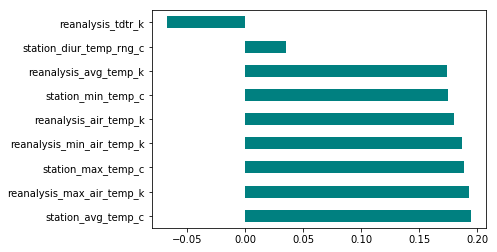

In [418]:
# this will tell us about linear relationships
temp_sj.corr().iloc[1:, 0].sort_values(ascending=False).plot(kind='barh', color='teal')

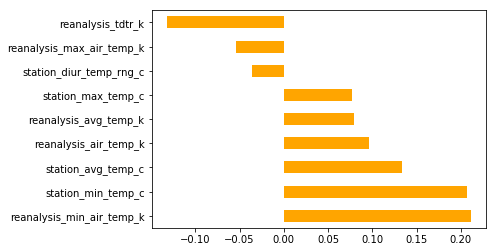

In [419]:
# quite different relationship between temperature and total cases in iq vs. sj; temp matters much more for sj
temp_iq.corr().iloc[1:, 0].sort_values(ascending=False).plot(kind='barh', color='orange')

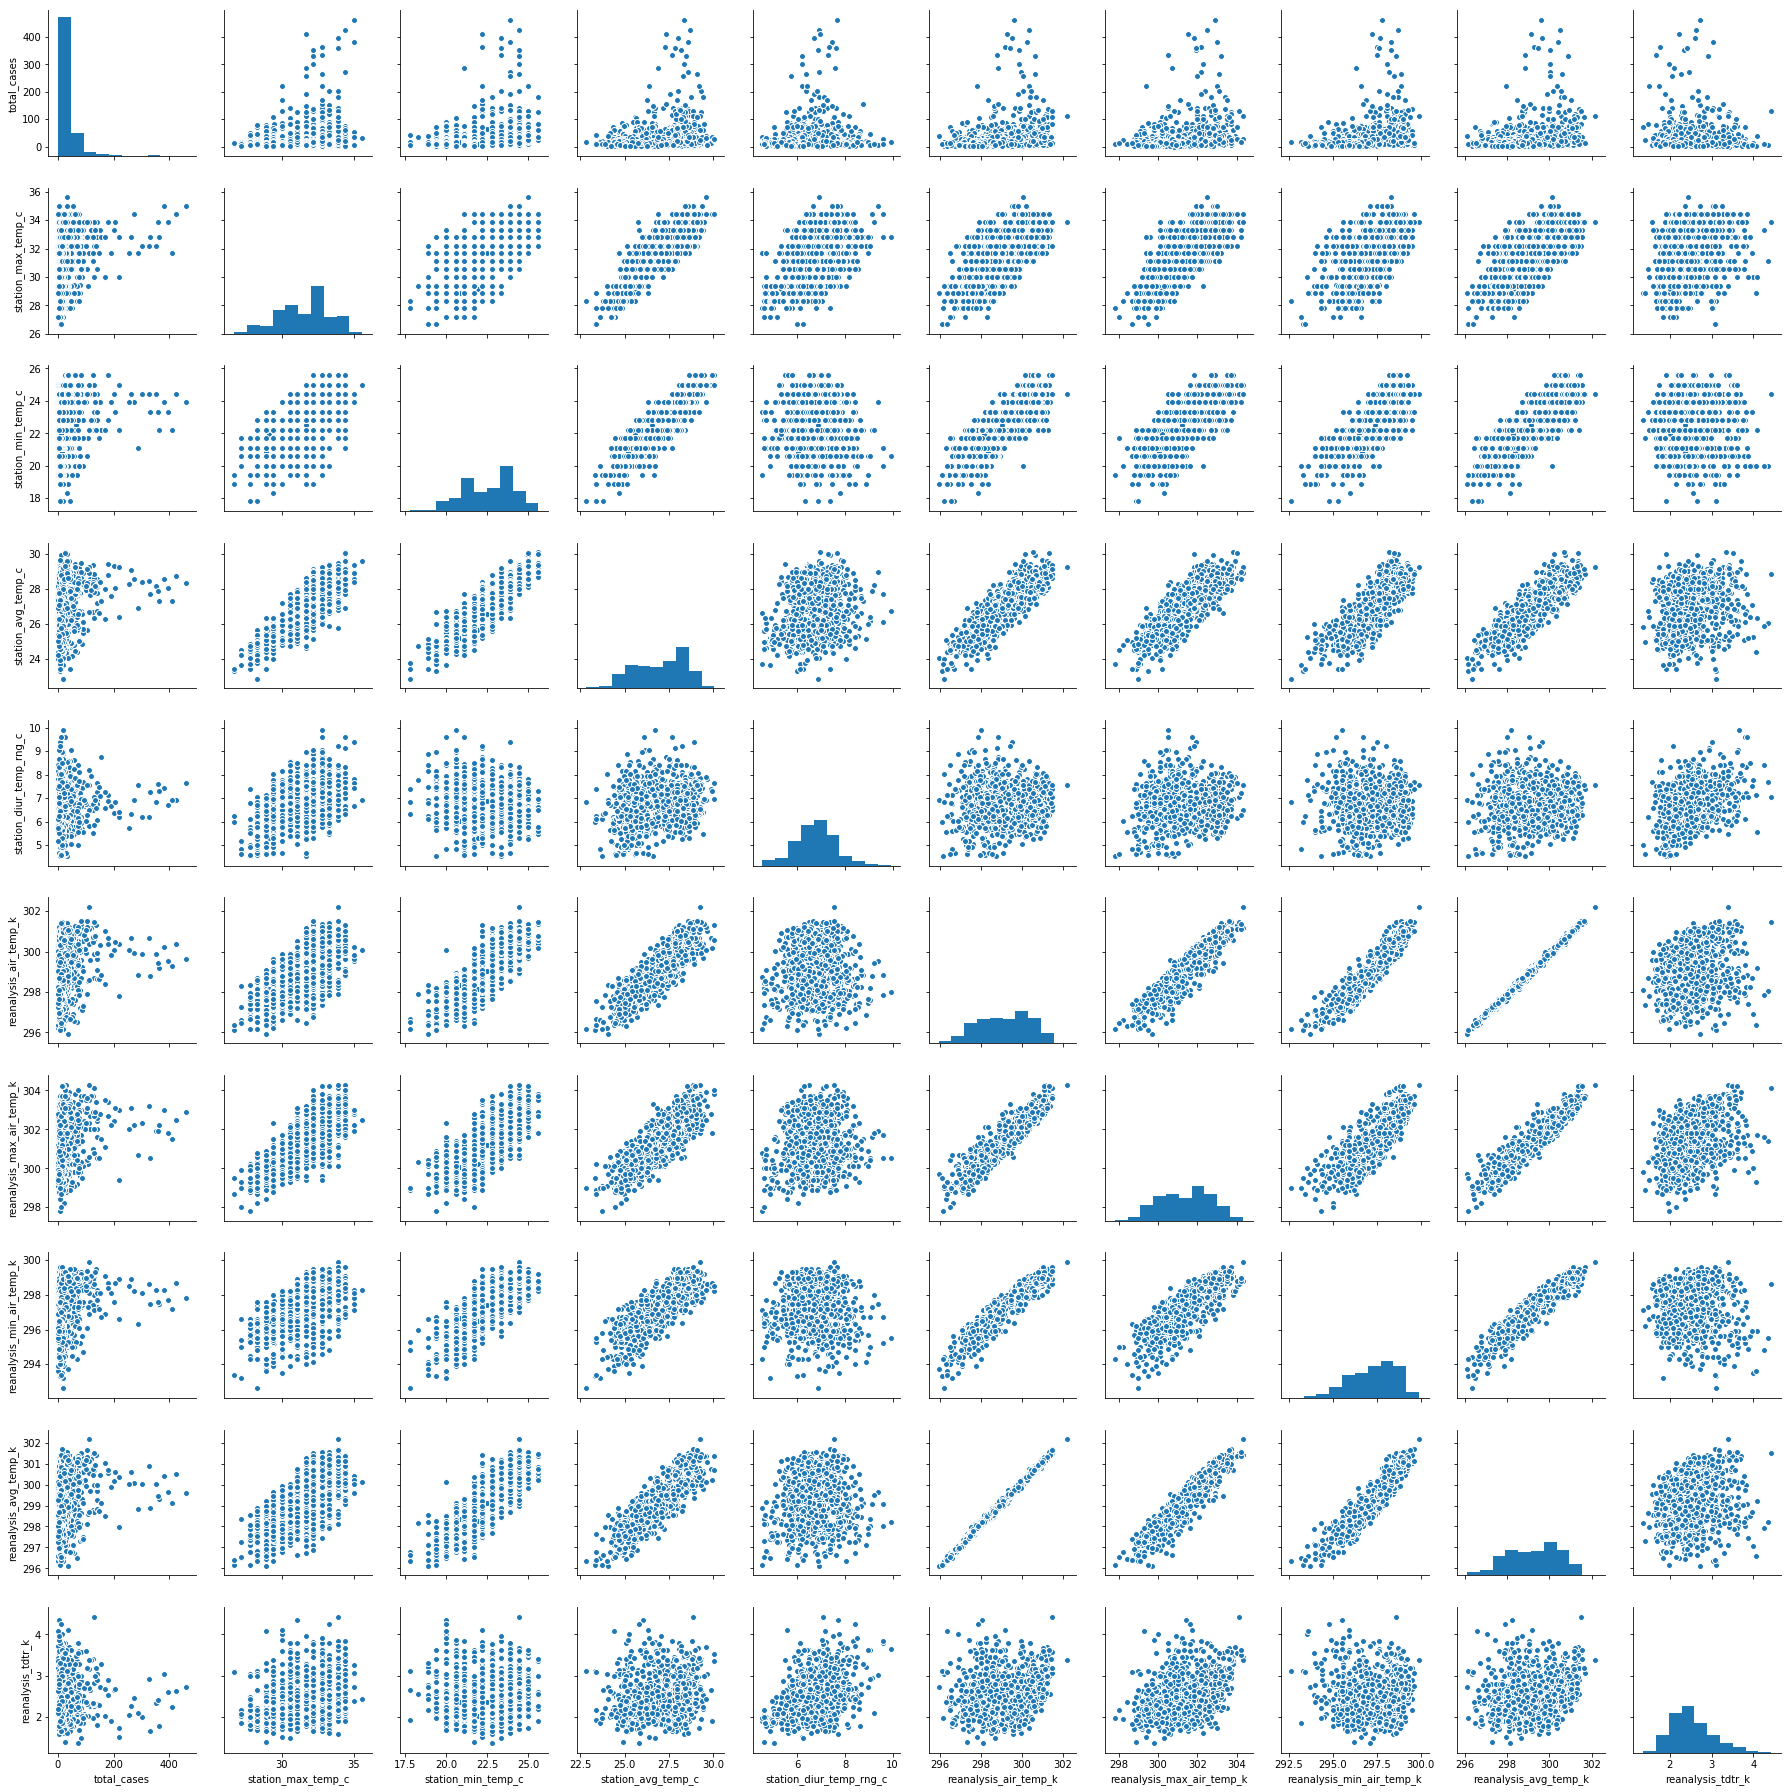

In [420]:
# let's look for nonlinear relationships 
sns.pairplot(temp_sj)

- non-linear relationships between temp vars and total cases (in first column)
- some clear correlations between temp vars

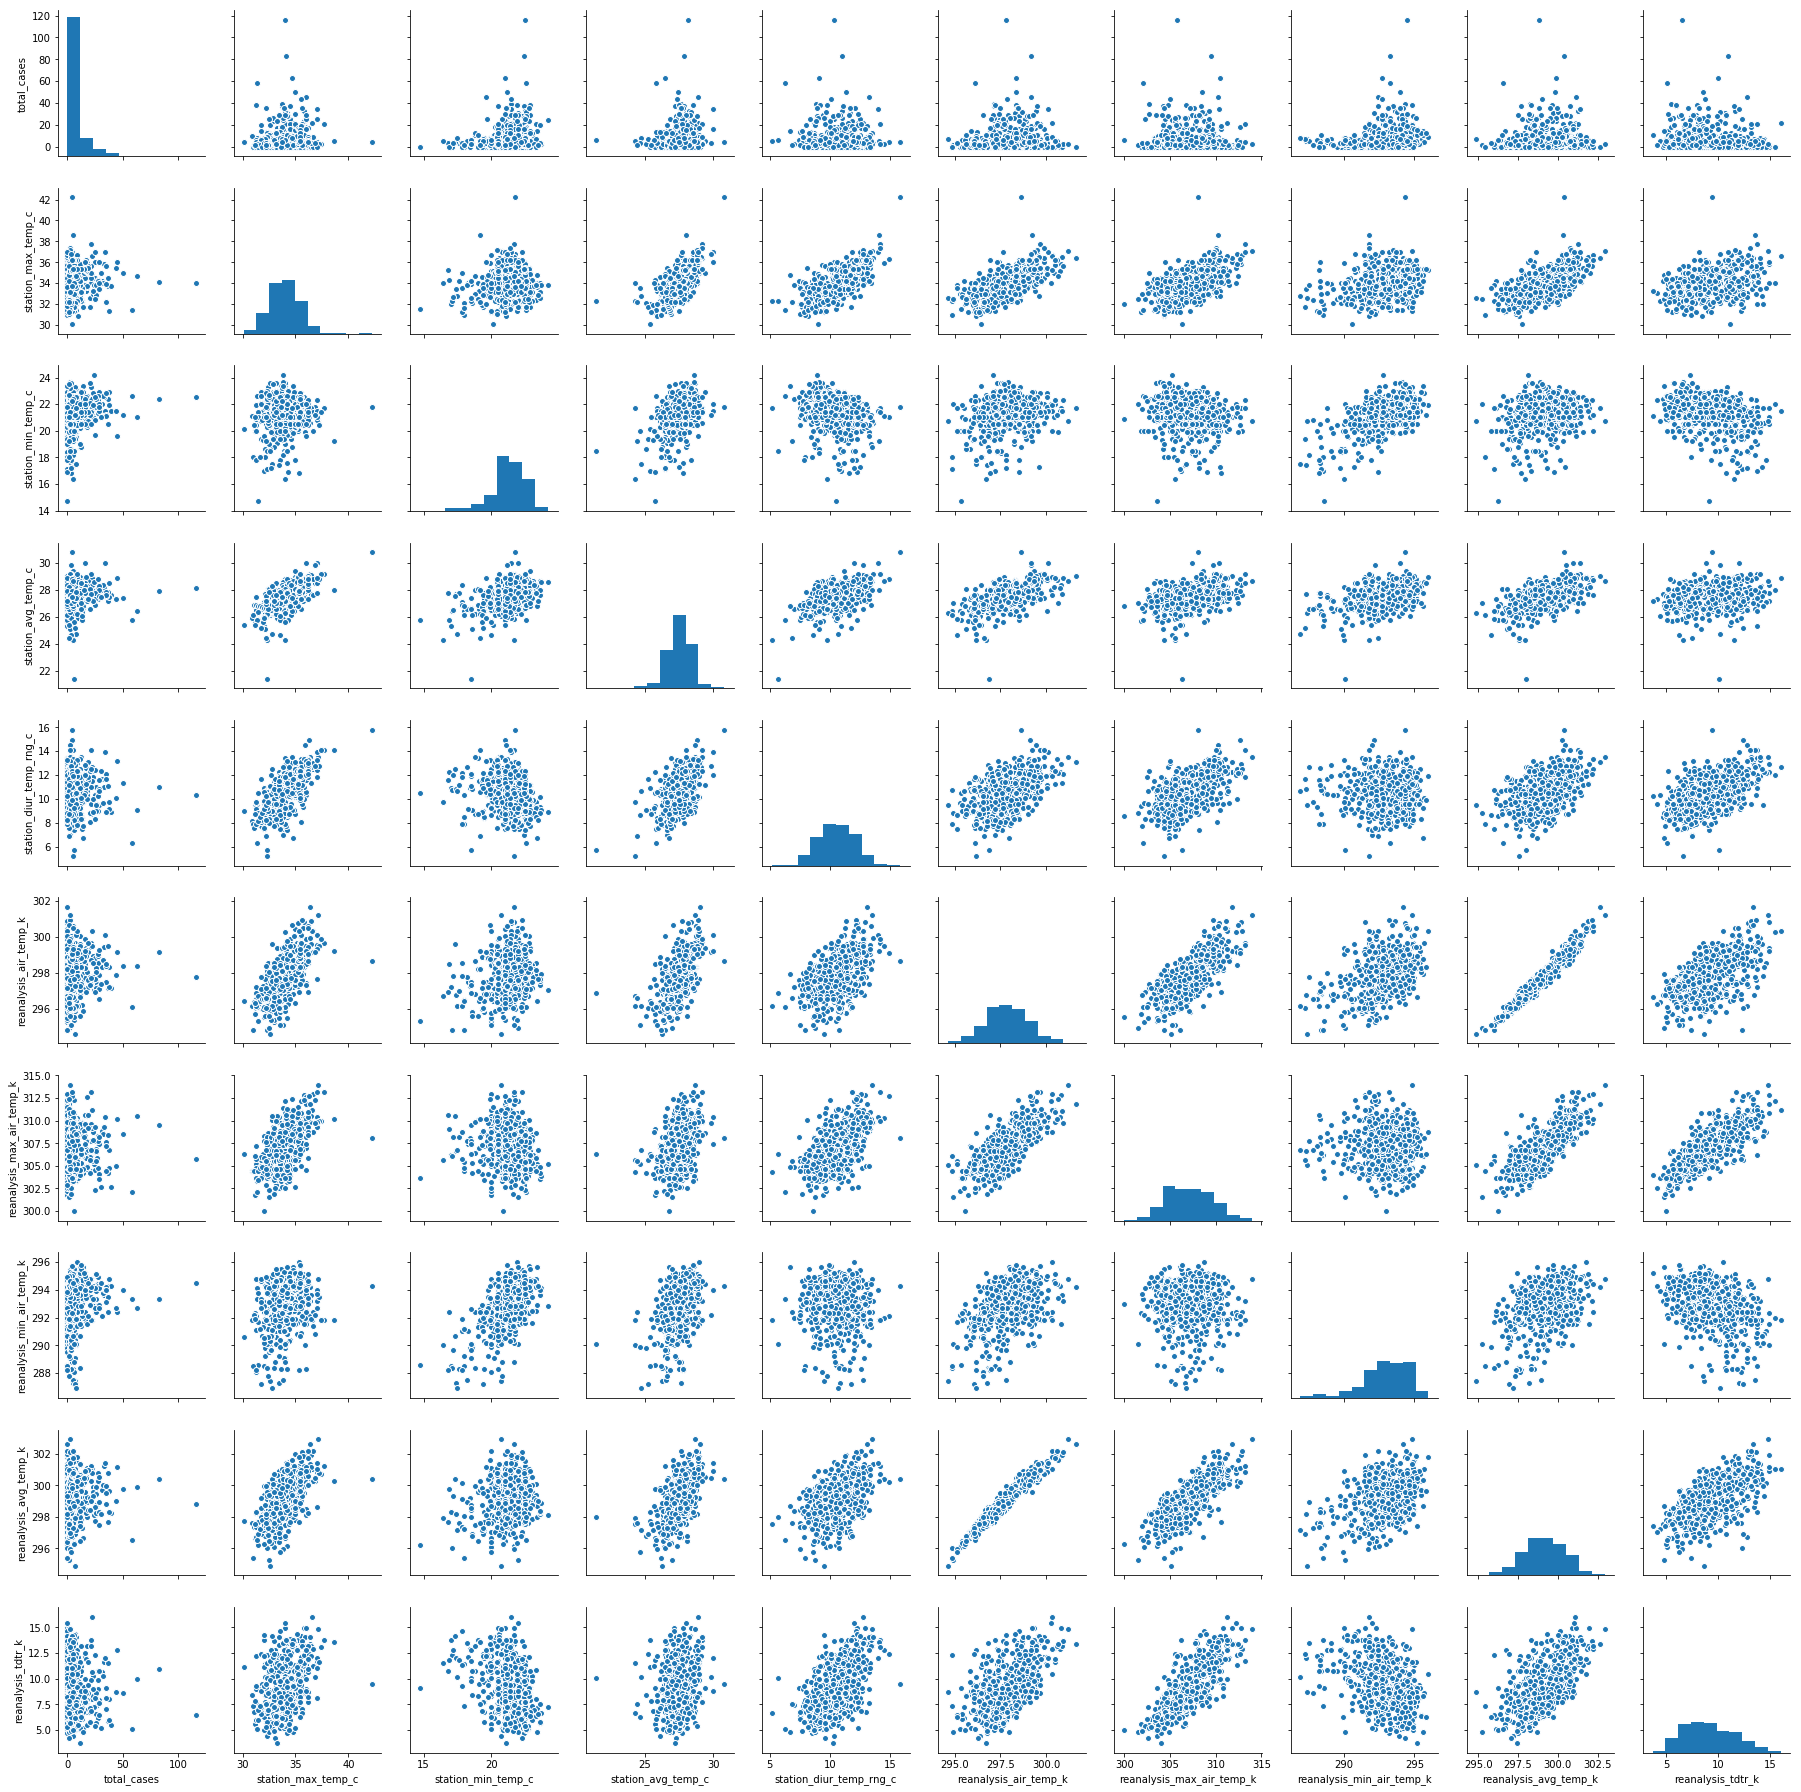

In [421]:
# looking again at temp correlations this time for Iquitos
sns.pairplot(temp_iq)

In [422]:
# appears that a simple dummy for city will not be sufficient; potentially need two different models given varying
# relationship between features and total cases in each city

## precipitation

- station_precip_mm – Total precipitation
- precipitation_amt_mm – Total precipitation
- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_precip_amt_kg_per_m2 – Total precipitation

note: four measures of total precipitation (expected they'd be more similar)

In [423]:
precip_sj = sj[['total_cases', 'station_precip_mm', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', \
            'reanalysis_precip_amt_kg_per_m2']]

precip_iq = iq[['total_cases', 'station_precip_mm', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', \
              'reanalysis_precip_amt_kg_per_m2']]

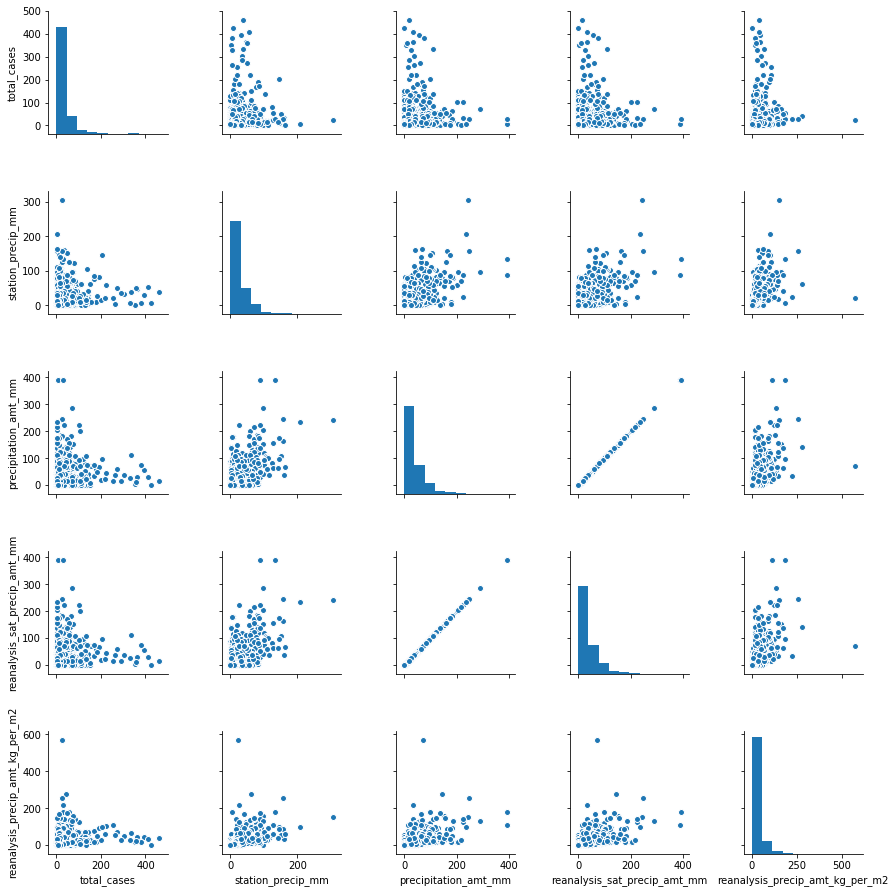

In [424]:
# San Juan
sns.pairplot(precip_sj)

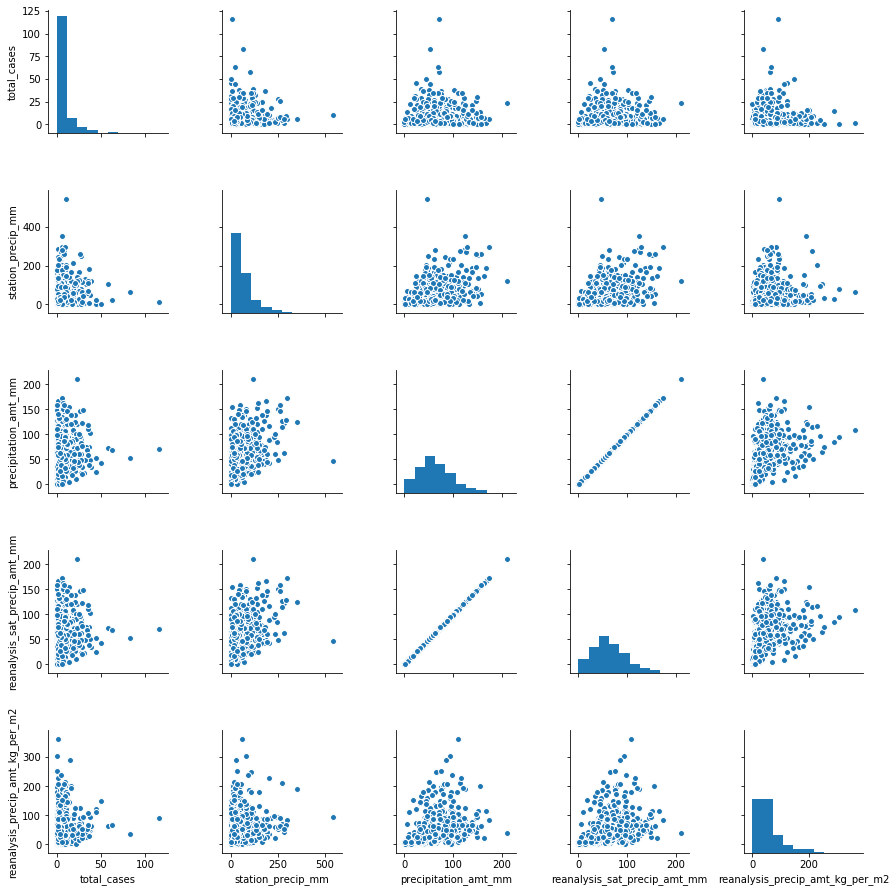

In [426]:
# Iquitos
sns.pairplot(precip_iq)

In [374]:
# note near perfect correlation between precipitation_amt_mm and renalysis_sat_precip_amt_mm

## humidity + dew point
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity
- reanalysis_dew_point_temp_k – Mean dew point temperature

In [427]:
humid_sj = sj[['total_cases', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', \
                'reanalysis_dew_point_temp_k']]

humid_iq = iq[['total_cases', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', \
                'reanalysis_dew_point_temp_k']]

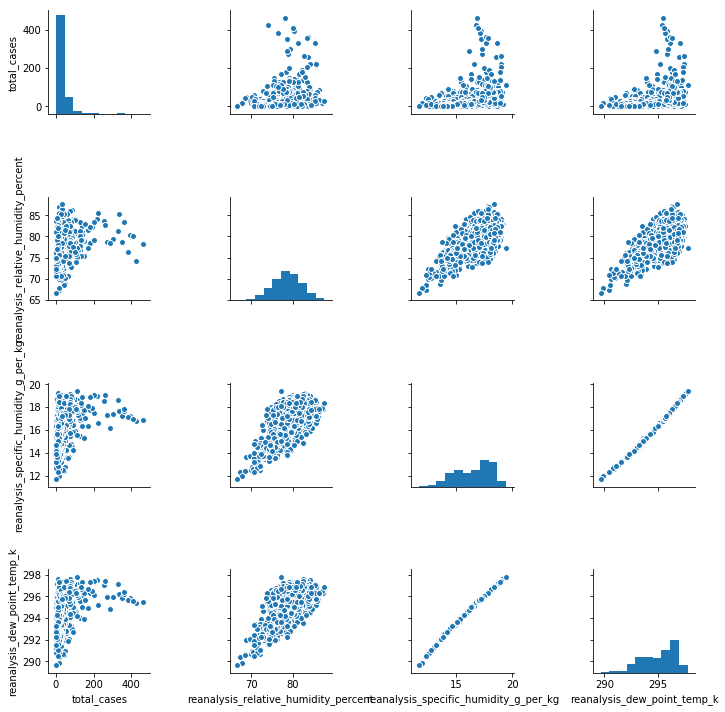

In [428]:
# San Juan
sns.pairplot(humid_sj)

In [377]:
# somewhat of a logarithmic correlation between humidity/dew point and total cases

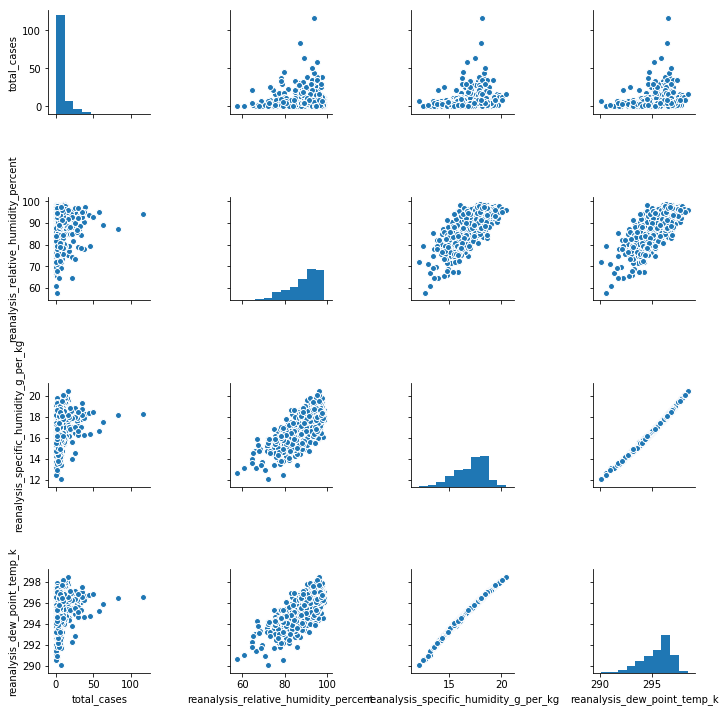

In [429]:
# Iquitos
sns.pairplot(humid_iq)

In [379]:
# humidity relationships appear most similar between cities compared to other categories looked at (precip, ndvi...)

In [430]:
## key takeaway is that there aren't real strong relationships between any of these variables and total_cases
## as such, decision trees may be a strong candidate here; also avoids issues of multicollinearity due to very similar variables

In [433]:
# save processed data
df.to_pickle('../data/processed/train.pkl')